In [1]:
# importing lib

import tensorflow as tf
from tensorflow import keras
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras        import models ,layers
from keras.models import Sequential
from keras.layers import Dense

In [25]:
#Importing the dataset

def load_images_from_folder(folder_path):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder_path))

    for class_idx, class_name in enumerate(class_names):
        class_folder = os.path.join(folder_path, class_name)
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            image = cv2.imread(img_path)
            if image is not None:
                image = cv2.resize(image,(250,250))
                images.append(image)
                labels.append(class_idx)

    return np.array(images), np.array(labels)

folder_path = "D:\\New folder\\data\\TMX7122020202-000800"
images, labels = load_images_from_folder(folder_path)

In [3]:
# checking the data set
images


array([[[[158, 158, 167],
         [107, 113, 101],
         [ 77,  87,  83],
         ...,
         [173, 178, 180],
         [210, 219, 223],
         [223, 234, 238]],

        [[142, 142, 153],
         [ 96, 103,  90],
         [ 72,  81,  79],
         ...,
         [209, 215, 216],
         [229, 238, 242],
         [225, 236, 239]],

        [[125, 126, 139],
         [ 95, 102,  89],
         [ 72,  82,  78],
         ...,
         [226, 234, 233],
         [232, 241, 242],
         [228, 239, 240]],

        ...,

        [[127, 132, 138],
         [126, 133, 136],
         [123, 130, 132],
         ...,
         [123, 128, 131],
         [119, 125, 130],
         [123, 133, 137]],

        [[123, 131, 135],
         [124, 132, 133],
         [118, 127, 127],
         ...,
         [129, 134, 138],
         [122, 129, 133],
         [126, 137, 141]],

        [[123, 132, 137],
         [120, 130, 130],
         [121, 131, 131],
         ...,
         [128, 132, 137],
        

In [4]:
# Normalize pixel values to the range [0, 1]
images = images.astype("float32") / 255.0

# Convert labels to one-hot encoding
labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes=6)

In [28]:
# splitting into train and test data

xtrain,xtest,ytrain,ytest =train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

In [6]:
xtrain.shape

(1548, 250, 250, 3)

In [7]:
xtest.shape

(388, 250, 250, 3)

In [8]:
ytrain.shape

(1548, 6)

In [9]:
ytest.shape

(388, 6)

In [10]:
# Defining array. Each item of array represent integer value of labels. 10 clothing item for 10 integer label.
class_names =['Curb', 'Guard_Rail', 'Pavement_Striping', 'Sidewalks','Bike_Lanes','Concrete_Barrier']
print("Depedent Classes--->",class_names)

Depedent Classes---> ['Curb', 'Guard_Rail', 'Pavement_Striping', 'Sidewalks', 'Bike_Lanes', 'Concrete_Barrier']


In [11]:
print("The no. of classess-->",len(class_names))

The no. of classess--> 6


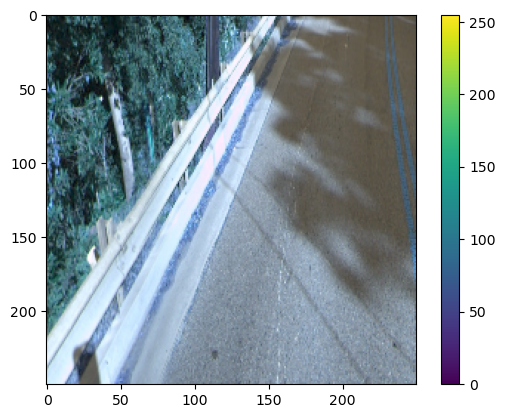

In [29]:
# inspect the data in the array

index=151# change this number 
plt.imshow(xtrain[index]) # printing 10th image
plt.colorbar() # shows the bar on the right side of the image



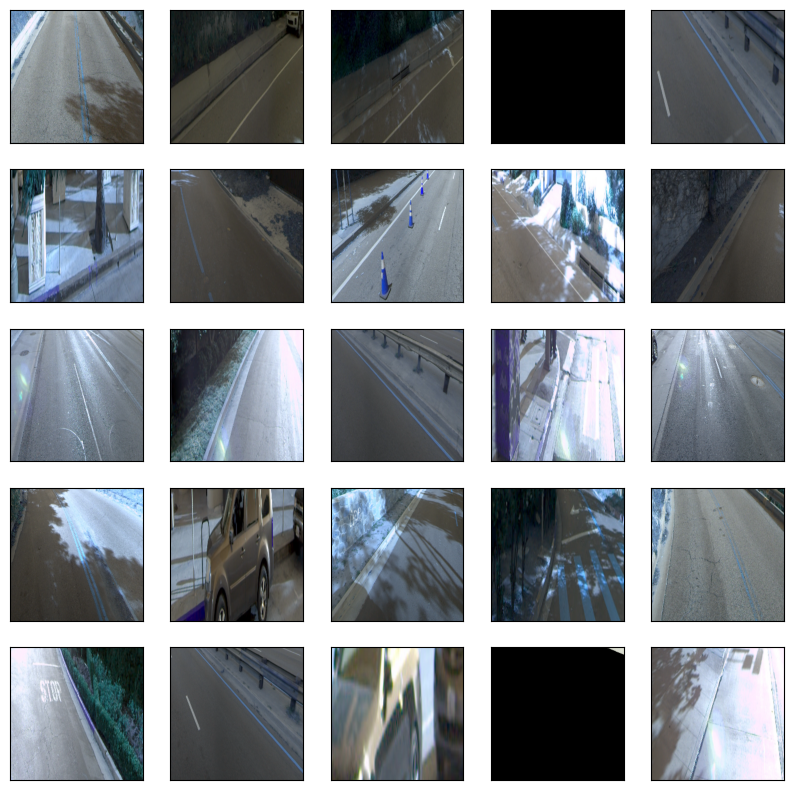

In [30]:
# display the first 25 images from traing set

plt.figure(figsize=(10,10))
for i in range(25): # 25 images
  plt.subplot(5,5,i+1) # matrix of 5 X 5 array
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(xtrain[i]) # printing binary/black and white image

plt.show()

In [14]:
#Scaling the image values

xtrain = xtrain/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
print(xtrain.shape)

xtest = xtest/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
print(xtest.shape)


(1548, 250, 250, 3)
(388, 250, 250, 3)


In [15]:
# Modelling - Model on CNN

from tensorflow.keras import models, layers

#==================== Creation of empty Architecture ====================#
# create a sequential model 
model=models.Sequential() #empty network

#==================== Feature Detection / extraction Block ====================#
# Add first convolutional block 

model.add(layers.Conv2D(6,(3,3),input_shape=(250,250,3),activation='relu')) #----> 1st Convolutional Layer
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2))) #----> 1st Max Pooling Layer

# Add Second convolutional block

model.add(layers.Conv2D(6,(3,3),activation='relu')) #----> 2nd Convolutional Layer
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))#----> 2nd Max Pooling Layer

#==================== Transition Block (from feature detection to classification) ====================#

# Add Flatten layer. Flatten simply converts matrics to array
model.add(layers.Flatten(input_shape=(250,250))) # this will flatten the image and after this Classification happens

#==================== Classification Block ====================#

# Classification segment - fully connected network

model.add(layers.Dense(128, activation='relu')) # as C5 layer in above image. 

# Add the output layer
model.add(layers.Dense(6, activation='softmax')) # as Output layer in above image. The output layer normally have softmax activation
model


In [16]:
# Compile the model

# if we use softmax activation in output layer then best fit optimizer is categorical_crossentropy
# for sigmoid activation in output layer then loss will be binary_crossentropy

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 6)       168       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 6)       330       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 6)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 22326)             0         
                                                                 
 dense (Dense)               (None, 128)               2

In [31]:
# Train the model 
model.fit(xtrain,ytrain,epochs=20,batch_size=16,validation_data=(xtest,ytest))

Epoch 1/20
97/97 [==============================] - 30s 305ms/step - loss: 10119.9707 - accuracy: 0.3495 - val_loss: 110.5113 - val_accuracy: 0.3505
Epoch 2/20
97/97 [==============================] - 29s 302ms/step - loss: 10.1842 - accuracy: 0.3398 - val_loss: 52.4781 - val_accuracy: 0.3557
Epoch 3/20
97/97 [==============================] - 31s 323ms/step - loss: 4.6961 - accuracy: 0.3398 - val_loss: 52.5089 - val_accuracy: 0.3557
Epoch 4/20
97/97 [==============================] - 37s 384ms/step - loss: 4.3012 - accuracy: 0.3404 - val_loss: 52.4226 - val_accuracy: 0.3557
Epoch 5/20
97/97 [==============================] - 34s 352ms/step - loss: 3.9296 - accuracy: 0.3404 - val_loss: 52.1910 - val_accuracy: 0.3557
Epoch 6/20
97/97 [==============================] - 33s 338ms/step - loss: 3.5161 - accuracy: 0.3404 - val_loss: 50.9677 - val_accuracy: 0.3557
Epoch 7/20
97/97 [==============================] - 29s 298ms/step - loss: 3.7781 - accuracy: 0.3391 - val_loss: 53.2038 - val_acc

In [19]:
# evaluate accuracy of the model
test_loss, test_acc = model.evaluate(xtest, ytest)
print("test accuracy:", test_acc)

13/13 [==============================] - 2s 116ms/step - loss: 0.9929 - accuracy: 0.6778
test accuracy: 0.6778350472450256


In [20]:
# predicting lable for test_images

predictions=model.predict(xtest)

# Prediction of the 1st result. It will show the 10 predictions of labels for test image
print("1. Prediction array: %s" % (predictions[0]))

# we will verify that which result for label has highest confidence
print("2. Label number having highest confidence in prediction array: %s" % (np.argmax(predictions[0])))

# let us verify what is the label in test_labels.
print("3. Actual label in dataset: %s" % (ytest[0]))

13/13 [==============================] - 2s 117ms/step
1. Prediction array: [2.8310715e-05 2.4577422e-04 6.0339514e-03 9.7091216e-01 6.9059725e-03
 1.5873991e-02]
2. Label number having highest confidence in prediction array: 3
3. Actual label in dataset: [0. 0. 0. 1. 0. 0.]


In [21]:
def plot_image(i, predictions_array, true_label, images): # taking index and 3 arrays viz. prediction array, true label array and image array
  
    predictions_array, true_label, images = predictions_array[i], true_label[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(images) 

    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    # print(predicted_label)
    # print(true_label)

    if predicted_label == true_label: #setting up label color
        color='blue' # correct then blue colour

    else:
        color='red' # wrong then red colour

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),color=color)
  

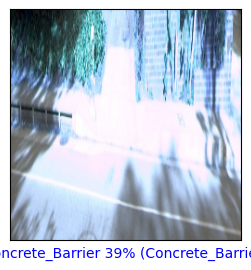

In [37]:
# defining parameters to pass to function
i= 61


# image number 56. You may change value of i for play around
plt.figure(figsize=(6,3))


plot_image(i, predictions, ytest, xtest)

plt.show()